In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv('BIKE DETAILS.csv')

In [88]:
#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
df[:10]


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [89]:
#Question 2: Check for missing values in all columns and describe your approach for handling them.
df.isnull().sum()


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [90]:
df.shape
#since a lot of rows consists null values we will not drop them and fill the data using mean or median

(1061, 7)

In [91]:
Q1 = df['ex_showroom_price'].quantile(0.25)
Q3 = df['ex_showroom_price'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['ex_showroom_price']<lower_bound) | (df['ex_showroom_price']>upper_bound)]
print(outliers)
#from the code it is clear that there are no outliers in the ex_showroom_price column so we use median to fill the null values

                                    name  selling_price  year seller_type  \
2    Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
13                         Yamaha YZF R3         365000  2019  Individual   
18   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
37                        Honda CBR-250R         120000  2016  Individual   
70                   Mahindra Mojo XT300         165000  2017  Individual   
..                                   ...            ...   ...         ...   
979            Royal Enfield Thunder 500         105000  2015  Individual   
981            Royal Enfield Thunder 350         105000  2013  Individual   
983            Royal Enfield Classic 350         100000  2015  Individual   
984            Royal Enfield Classic 500          95000  2014  Individual   
985            Royal Enfield Classic 500          90000  2011  Individual   

         owner  km_driven  ex_showroom_price  
2    1st owner      12000   

In [92]:
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)

In [93]:
df.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [94]:
df.duplicated().sum()

np.int64(6)

In [95]:
df = df.drop_duplicates()

In [96]:
df.duplicated().sum()

np.int64(0)

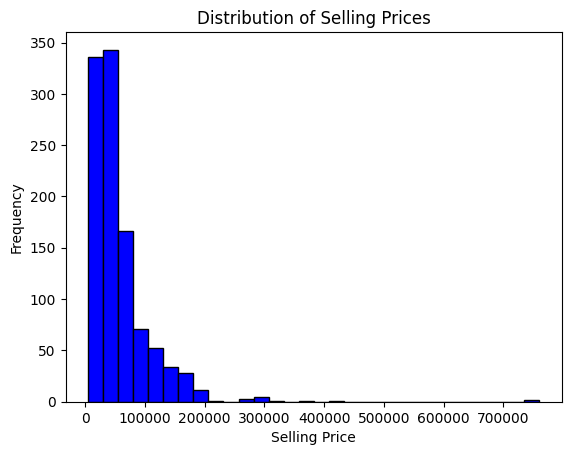

In [97]:
#Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.
plt.hist(df['selling_price'],bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()
#From the histogram we can notice that number of bikes sold reduces as the price increases

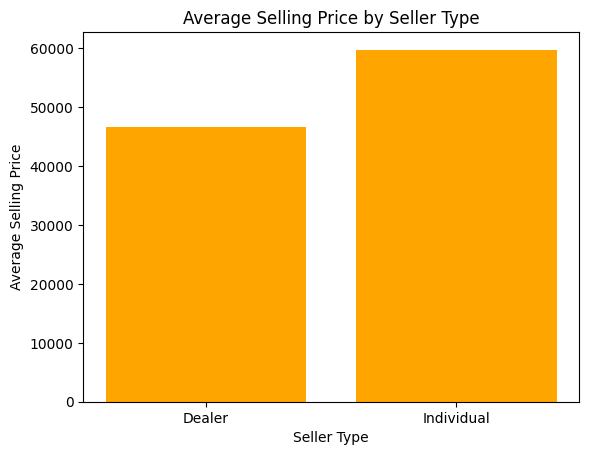

In [98]:
#Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.
avg_selling_price = df.groupby('seller_type')['selling_price'].mean()
plt.bar(avg_selling_price.index, avg_selling_price.values, color='orange')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()
#Observation: Individual sellers tend to have a higher average selling price compared to dealer sellers.

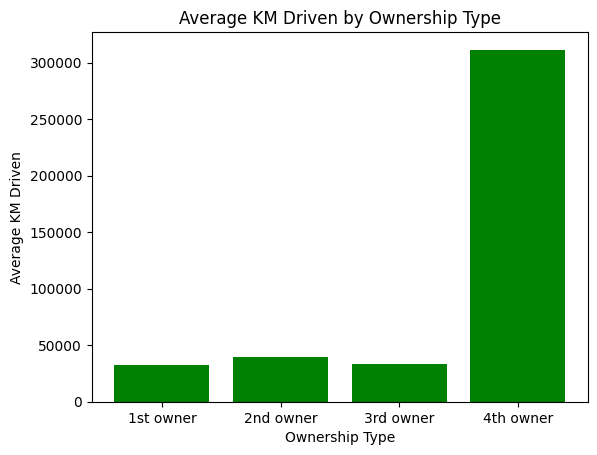

In [99]:
#Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
avg_km_driven = df.groupby('owner')['km_driven'].mean()
plt.bar(avg_km_driven.index,avg_km_driven.values,color='g')
plt.title('Average KM Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average KM Driven')
plt.show()

In [100]:
#Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = df[(df['km_driven']<lower_bound) | (df['km_driven']>upper_bound)]
print(outliers)


                                 name  selling_price  year seller_type  \
91           Honda Activa [2000-2015]          22989  2012  Individual   
93                      Suzuki GS150R          30000  2010  Individual   
115           Hero Honda Passion Plus           7500  2004  Individual   
135            Hero Honda CBZ extreme          20000  2007  Individual   
154                Hero Xtreme Sports          22000  2014  Individual   
184              Honda CB Unicorn 160          75000  2015  Individual   
363                Hero Honda CD100SS          10000  1997  Individual   
470          Honda Activa [2000-2015]          23000  2009  Individual   
474     Hero Honda Passion PRO [2012]          12000  2012  Individual   
477          Honda Activa [2000-2015]          25000  2009  Individual   
511                Hero Splendor Plus          12000  2007  Individual   
535              Hero Honda CD Deluxe          12000  2007  Individual   
548                         Bajaj Xcd 

In [101]:
filtered_df = df[(df['km_driven']>lower_bound) & (df['km_driven']<upper_bound)]
#summary before removing outliers
df['km_driven'].describe()

count      1055.000000
mean      34295.628436
std       51708.286608
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

In [102]:
#summary after removing outliers
filtered_df['km_driven'].describe()

count     1017.000000
mean     28166.171091
std      19516.739607
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

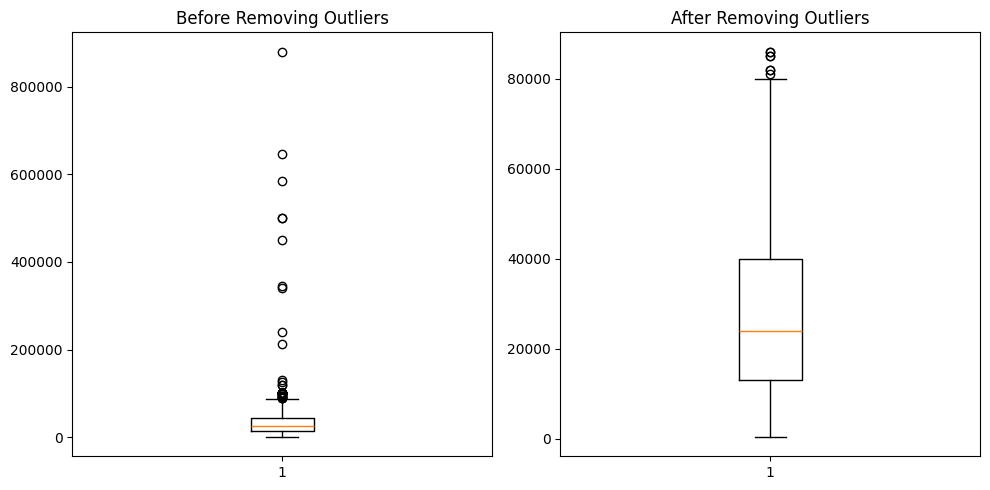

In [103]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df['km_driven'])
plt.title("Before Removing Outliers")

plt.subplot(1, 2, 2)
plt.boxplot(filtered_df['km_driven'])
plt.title("After Removing Outliers")

plt.tight_layout()
plt.show()

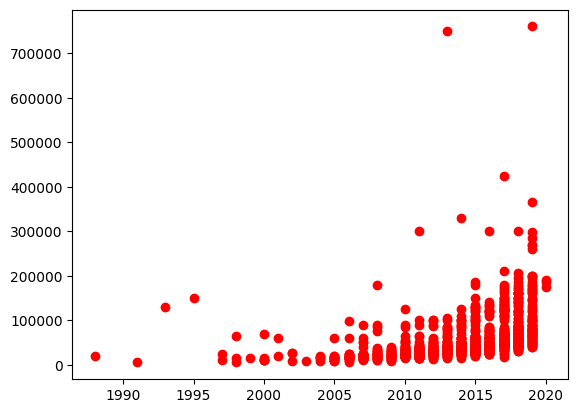

In [104]:
#Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price
plt.scatter(df['year'],df['selling_price'],c='r')
plt.show()

In [105]:
# Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.


from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['seller_type']]).toarray()
encoded_df = pd.DataFrame(encoded, columns = encoder.get_feature_names_out())
new_df = pd.concat([df,encoded_df],axis=1)
new_df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000.0,2019.0,Individual,1st owner,350.0,72752.5,0.0,1.0
1,Honda Dio,45000.0,2017.0,Individual,1st owner,5650.0,72752.5,0.0,1.0
2,Royal Enfield Classic Gunmetal Grey,150000.0,2018.0,Individual,1st owner,12000.0,148114.0,0.0,1.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015.0,Individual,1st owner,23000.0,89643.0,0.0,1.0
4,Yamaha SZ [2013-2014],20000.0,2011.0,Individual,2nd owner,21000.0,72752.5,0.0,1.0


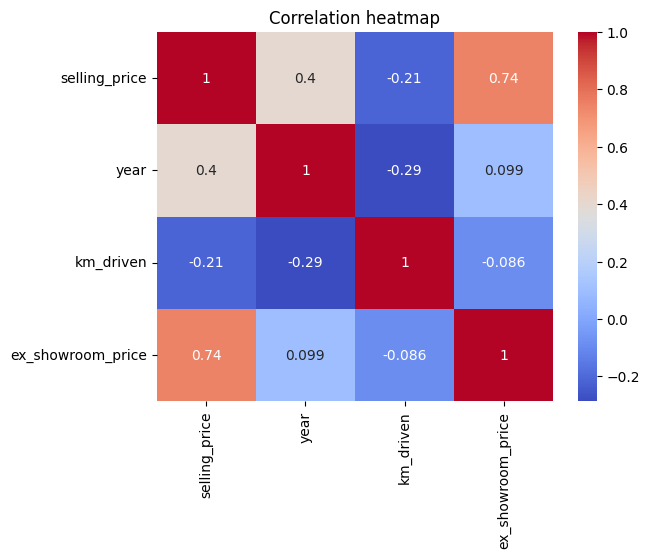

In [106]:
#Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap = 'coolwarm',annot=True)
plt.title("Correlation heatmap")
plt.show()
#From the figure we can see the correlation between selling price and ex showroom price is high and stands out the most

In [107]:
#Question 10: Summarize your findings in a brief report:
#● What are the most important factors affecting a bike's selling price?
#● Mention any data cleaning or feature engineering you performed.

#Answer: 
# The bike's selling price majorly depends on the ex showroom price and te year of launch
# We fillend null values using median and removed all duplicate values